In [1]:
from keras import datasets,models,layers
import numpy as np

Using TensorFlow backend.


In [3]:
imdb= datasets.imdb
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(
    path=r'F:\work\keras\two_classification\data\imdb.npz',num_words=10000)
word_index=imdb.get_word_index()
reverse_word_index=dict(
    [(value,key) for (key,value) in word_index.items()])
decode_review=' '.join(
    [reverse_word_index.get(i-3,'?') for i in train_data[0]])

def vectorize_sequences(sequences,dimension=10000):
    result=np.zeros((len(sequences),dimension))
    for i , sequence in enumerate(sequences):
        result[i,sequence]=1.
    return result

In [4]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [5]:
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [6]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]

y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [7]:
history=model.fit(partial_x_train,partial_y_train,
                  epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 8s 562us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 2s 157us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 2s 140us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - 

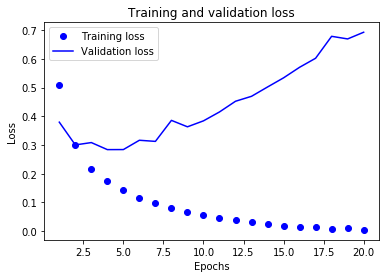

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
# "bo" is for "blue dot"（'bo' 表示蓝色圆点）
plt.plot(epochs, loss_values, 'bo', label='Training loss')
# b is for "solid blue line"（'b' 表示蓝色实线）
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
from keras import losses
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])

In [13]:
model.fit(x_train,y_train,epochs=4,batch_size=1000)
result=model.evaluate(x_test,y_test)
pre=model.predict(x_test)

Epoch 1/4
25000/25000 [==============================] - 4s 158us/step - loss: 0.5443 - acc: 0.7858
Epoch 2/4
25000/25000 [==============================] - 2s 85us/step - loss: 0.3546 - acc: 0.8902
Epoch 3/4
25000/25000 [==============================] - 2s 81us/step - loss: 0.2703 - acc: 0.9127
Epoch 4/4
25000/25000 [==============================] - 6s 241us/step


In [14]:
print(result,pre)

[0.2887643384742737, 0.88792] [[0.32603505]
 [0.9990338 ]
 [0.790119  ]
 ...
 [0.16923422]
 [0.1506425 ]
 [0.56145775]]
